<a href="https://colab.research.google.com/github/kumareshvj/EDA/blob/main/Airbnb%20booking%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:** EDA
Contribution - Individual

**Project summary -** write the summary here within 500 - 600 words

**GitHub Link -**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
#import geopandas as gpd
#import folium

In [3]:
file_path = '/content/drive/MyDrive/AlmaBetter/capstone project/Python_for_data science/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

In [4]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Total null value available in the airbnb dataset
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
neighbourhood_group_index = airbnb_df.neighbourhood_group.value_counts().index
neighbourhood_group_value =airbnb_df.neighbourhood_group.value_counts().values

([<matplotlib.patches.Wedge at 0x7fbdf68716d0>,
 [Text(0.21369925310190047, 1.18081862672626, 'Manhattan'),
  Text(-0.71389145910468, -0.9645511829951748, 'Brooklyn'),
  Text(0.9365212904925617, -0.5769990229230436, 'Queens'),
  Text(1.0923467232360349, -0.1295323752407009, 'Bronx'),
  Text(1.0996841146061016, -0.026359971225222757, 'Staten Island')],
 [Text(0.12465789764277525, 0.6888108655903181, '44.30%'),
  Text(-0.41643668447772997, -0.5626548567471853, '41.12%'),
  Text(0.5108297948141245, -0.3147267397762056, '11.59%'),
  Text(0.5958254854014735, -0.07065402285856412, '2.23%'),
  Text(0.5998276988760554, -0.014378166122848774, '0.76%')])

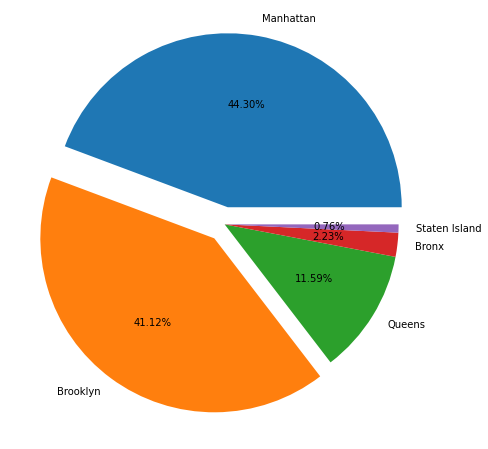

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.pie(neighbourhood_group_value,labels = neighbourhood_group_index,autopct='%1.2f%%',explode =(0.1,0.1,0,0,0))

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Observation:
Highest number of neighbourhood is manhattan with 44.30% and lowest is staten island with 0.76%

In [ ]:
airbnb_without_review = airbnb_df[(airbnb_df['reviews_per_month'].isna()) & airbnb_df['last_review'].isna()]

In [ ]:
airbnb_without_review.shape

(10052, 16)

In [ ]:
airbnb_without_review.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


In [ ]:
airbnb_without_review['room_type'].value_counts()

Entire home/apt    5077
Private room       4661
Shared room         314
Name: room_type, dtype: int64

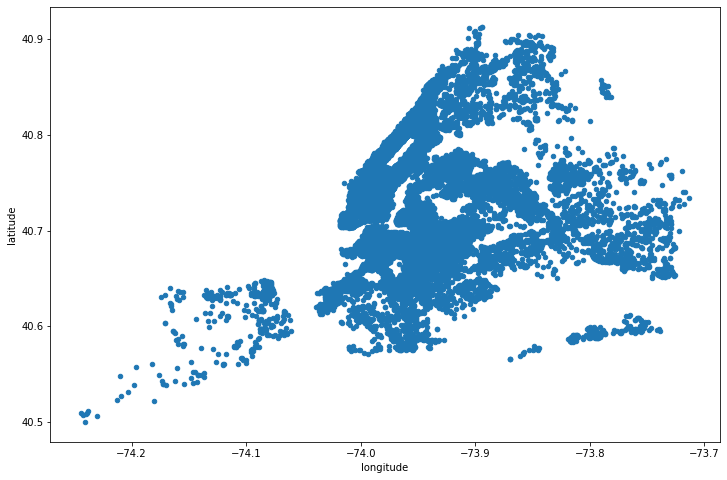

In [ ]:
airbnb_df.plot(x="longitude", y="latitude", kind="scatter",
        colormap="YlOrRd")

In [ ]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
countries['name'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

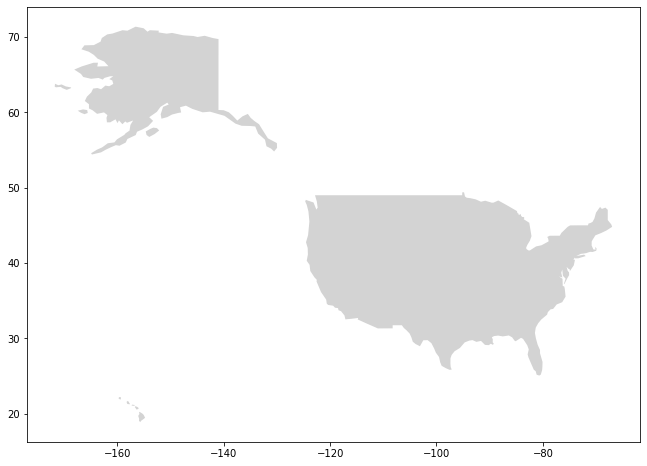

In [ ]:
countries[countries["name"] == "United States of America"].plot(color="lightgrey")

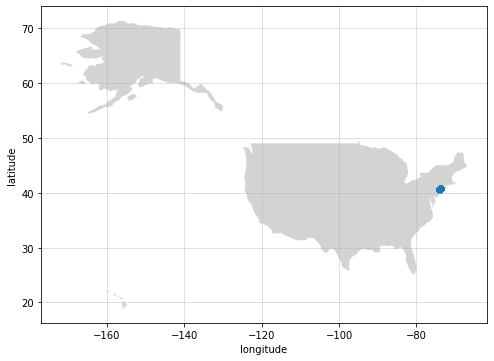

In [ ]:

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)



# plot points
airbnb_df.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

In [ ]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
cities = gpd.read_file(
               gpd.datasets.get_path("naturalearth_cities"))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [ ]:
cities['name'].unique()

array(['Vatican City', 'San Marino', 'Vaduz', 'Lobamba', 'Luxembourg',
       'Palikir', 'Majuro', 'Funafuti', 'Melekeok', 'Bir Lehlou',
       'Monaco', 'Tarawa', 'Moroni', 'Andorra', 'Port-of-Spain', 'Kigali',
       'Mbabane', 'Juba', 'The Hague', 'Ljubljana', 'Bratislava', 'Doha',
       'Podgorica', 'Sri Jayawardenepura Kotte', 'Baguio', 'Dodoma',
       'Bern', 'Laayoune', 'Pristina', 'Roseau', 'Djibouti', 'Putrajaya',
       'Kyoto', 'Banjul', 'Skopje', 'Bridgetown', 'Porto-Novo',
       'Bujumbura', 'Kingstown', 'Castries', 'Basseterre', 'Port Louis',
       "Saint George's", 'Manama', "Saint John's", 'Montevideo', 'Lomé',
       'Tunis', 'Abu Dhabi', 'Ashgabat', 'Lusaka', 'Harare', 'Dili',
       'Port Vila', 'Tegucigalpa', 'Georgetown', 'Reykjavík',
       'Port-au-Prince', 'Kampala', 'Paramaribo', 'Niamey', 'Dushanbe',
       'Asunción', 'Managua', 'Freetown', 'Islamabad', 'Kathmandu',
       'Bloemfontein', 'Pretoria', 'Port Moresby', 'Honiara',
       'Panama City', 'Rabat

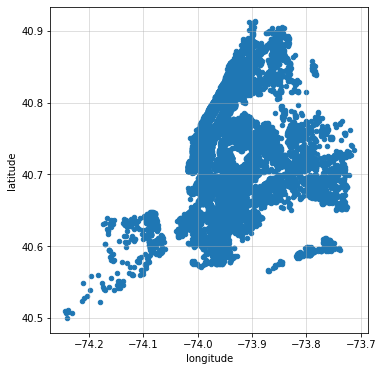

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
cities[cities["name"] == "New York"].plot(color="lightgrey", ax=ax)



# plot points
airbnb_df.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

In [ ]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
cities = cities.to_crs("EPSG:3395")

In [ ]:
countries.boundary.plot()

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:938: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:939: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:940: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:941: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbe163418b0> (for post_execute):


ValueError: ignored

ValueError: ignored

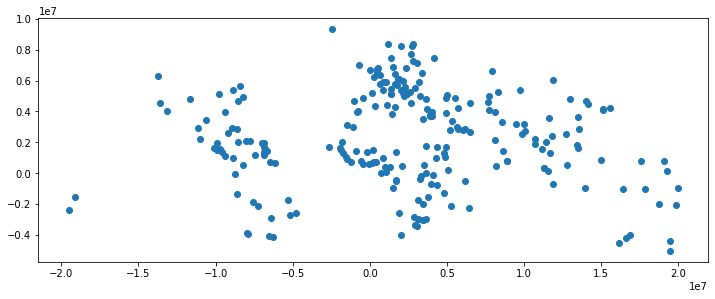

In [ ]:
cities.plot()